### 목표
- 활성화 함수와 경사하강법 최적의 조합을 확인해보자
- 모델링에 도움이 되는 callback 함수 (모델 저장, 조기학습중단)을 알아보자

### 데이터 로딩

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
# 데이터 분리
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# 크기 확인
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

### 활성화 함수와 경사하강법 조합에 따른 성능비교
1. sigmoid + SGD 조합
2. relu + SGD 조합
3. relu + Adam 조합

In [ ]:
# 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.optimizers import SGD, Adam # 경사하강법 클래스 사용

In [ ]:
# 1. sigmoid + SGD 조합
# 뼈대
model1 = Sequential()
# 입력층
model1.add(InputLayer (input_shape = (28,28)))

# 사진 데이터 (2차원 -> 1차원)
model1.add(Flatten()) # 2차원의 사진 데이터를 1차원으로 변경 (선형모델을 위한 작업)

# 중간층 (5개층 (unit 64, 128, 256, 128, 64))
model1.add(Dense(units = 64, activation = 'sigmoid'))
model1.add(Dense(units = 128, activation = 'sigmoid'))
model1.add(Dense(units = 256, activation = 'sigmoid'))
model1.add(Dense(units = 128, activation = 'sigmoid'))
model1.add(Dense(units = 64, activation = 'sigmoid'))

# 출력층
model1.add(Dense(units=10, activation='softmax'))

In [ ]:
# 2. 학습방법 및 평가방법 설정
model1.compile(loss = 'sparse_categorical_crossentropy', # 정답데이터의 shape 맞추는 과정
                    optimizer = SGD(learning_rate=0.01), # SGD 기본학습률 : 0.01
                    metrics = ['accuracy'])              # 분류이니까 accuracy

In [ ]:
# 3. 학습 # epochs = 20
h1 = model1.fit(X_train, y_train,
                    validation_split=0.2, # 교차검증
                    batch_size=128,
                     epochs = 20)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 2.3086 - accuracy: 0.1100 - val_loss: 2.3022 - val_accuracy: 0.1060
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 3/20
375/375 [==============================] - 3s 8ms/step - loss: 2.3011 - accuracy: 0.1141 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3015 - val_accuracy: 0.1060
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 2.3008 - accuracy: 0.1140 - val_loss: 2.3018 - val_accuracy: 0.1060
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 2.3007 - accuracy: 0.1137 - val_loss: 2.3017 - val_accuracy: 0.1060
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 2.3006 - accuracy: 0.1140 - val_loss: 2.3011 - val_accuracy: 0.1060
Epoch 

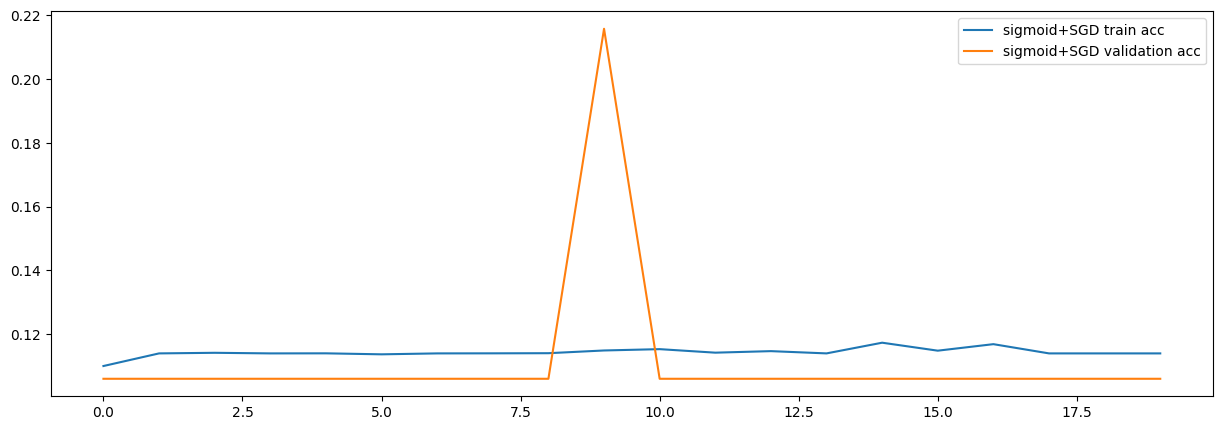

In [ ]:
# 학습결과 시각화

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loss
plt.figure(figsize=(15,5))
# sigmoid + SGD 조합
plt.plot(h1.history['accuracy'], label="sigmoid+SGD train acc")
plt.plot(h1.history['val_accuracy'], label="sigmoid+SGD validation acc")
plt.legend()
plt.show()

### 2. relu + SGD 조합

In [ ]:
# 1. relu + SGD 조합
# 뼈대
model2 = Sequential()
# 입력층
model2.add(InputLayer (input_shape = (28,28)))

# 사진 데이터 (2차원 -> 1차원)
model2.add(Flatten()) # 2차원의 사진 데이터를 1차원으로 변경 (선형모델을 위한 작업)

# 중간층 (5개층 (unit 64, 128, 256, 128, 64))
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dense(units = 128, activation = 'relu'))
model2.add(Dense(units = 256, activation = 'relu'))
model2.add(Dense(units = 128, activation = 'relu'))
model2.add(Dense(units = 64, activation = 'relu'))

# 출력층
model2.add(Dense(units=10, activation='softmax'))

In [ ]:
# 2. 학습방법 및 평가방법 설정
model2.compile(loss = 'sparse_categorical_crossentropy', # 정답데이터의 shape 맞추는 과정
                    optimizer = SGD(learning_rate=0.01), # SGD 기본학습률 : 0.01
                    metrics = ['accuracy'])              # 분류이니까 accuracy

In [ ]:
# 3. 학습 # epochs = 20
h2 = model2.fit(X_train, y_train,
                    validation_split=0.2, # 교차검증
                    epochs = 20,
                    batch_size=128)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 6.7883 - accuracy: 0.1136 - val_loss: 2.3015 - val_accuracy: 0.1065
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 2.2964 - accuracy: 0.1177 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 

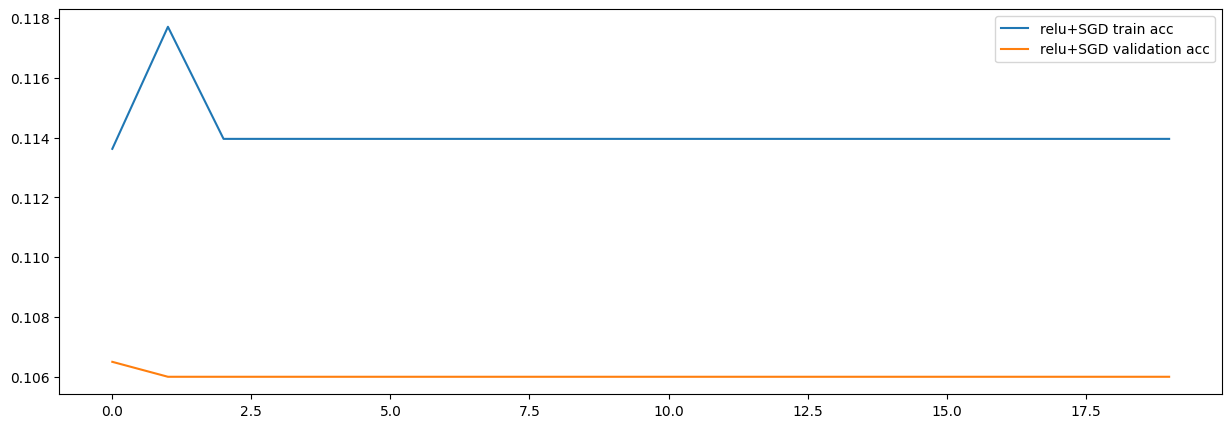

In [ ]:
# loss
plt.figure(figsize=(15,5))
# relu + SGD 조합
plt.plot(h2.history['accuracy'], label="relu+SGD train acc")
plt.plot(h2.history['val_accuracy'], label="relu+SGD validation acc")
plt.legend()
plt.show()

### 3. relu + Adam 조합

In [ ]:
# 3. relu + Adam 조합
# 뼈대
model3 = Sequential()
# 입력층
model3.add(InputLayer (input_shape = (28,28)))

# 사진 데이터 (2차원 -> 1차원)
model3.add(Flatten()) # 2차원의 사진 데이터를 1차원으로 변경 (선형모델을 위한 작업)

# 중간층 (5개층 (unit 64, 128, 256, 128, 64))
model3.add(Dense(units = 64, activation = 'relu'))
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dense(units = 256, activation = 'relu'))
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dense(units = 64, activation = 'relu'))

# 출력층
model3.add(Dense(units=10, activation='softmax'))


# 2. 학습방법 및 평가방법 설정
model3.compile(loss = 'sparse_categorical_crossentropy', # 정답데이터의 shape 맞추는 과정
                    optimizer = Adam(learning_rate=0.001), # Adam 기본학습률 : 0.001
                    metrics = ['accuracy'])

# 3. 학습 # epochs = 20
h3 = model3.fit(X_train, y_train,
                    validation_split=0.2, # 교차검증
                    epochs = 20,
                    batch_size=128)


Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.7344 - accuracy: 0.8322 - val_loss: 0.2604 - val_accuracy: 0.9207
Epoch 2/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2181 - accuracy: 0.9340 - val_loss: 0.2200 - val_accuracy: 0.9375
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1541 - accuracy: 0.9542 - val_loss: 0.1840 - val_accuracy: 0.9477
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1226 - accuracy: 0.9627 - val_loss: 0.1643 - val_accuracy: 0.9544
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0965 - accuracy: 0.9702 - val_loss: 0.1842 - val_accuracy: 0.9528
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0903 - accuracy: 0.9717 - val_loss: 0.1534 - val_accuracy: 0.9600
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0787 - accuracy: 0.9756 - val_loss: 0.1632 - val_accuracy: 0.9608
Epoch 

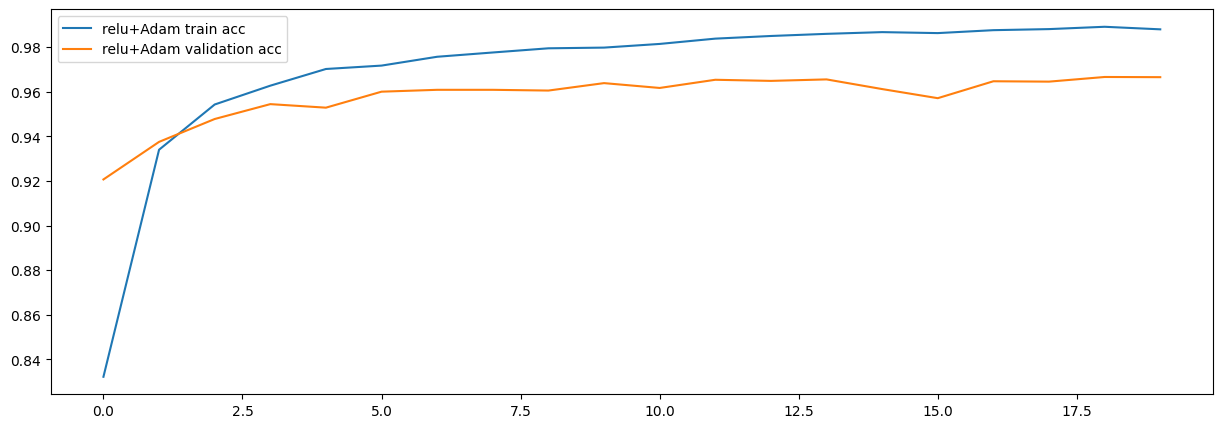

In [ ]:
plt.figure(figsize=(15,5))
# relu + Adam 조합
plt.plot(h3.history['accuracy'], label="relu+Adam train acc")
plt.plot(h3.history['val_accuracy'], label="relu+Adam validation acc")

plt.legend()
plt.show()

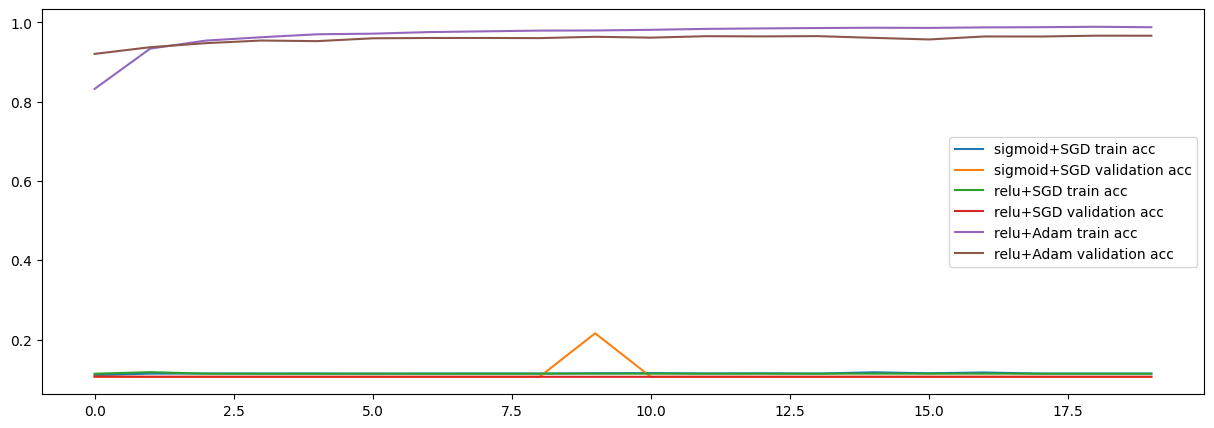

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
# sigmoid + SGD 조합
plt.plot(h1.history['accuracy'], label="sigmoid+SGD train acc")
plt.plot(h1.history['val_accuracy'], label="sigmoid+SGD validation acc")
# relu + SGD 조합
plt.plot(h2.history['accuracy'], label="relu+SGD train acc")
plt.plot(h2.history['val_accuracy'], label="relu+SGD validation acc")
# relu + Adam 조합
plt.plot(h3.history['accuracy'], label="relu+Adam train acc")
plt.plot(h3.history['val_accuracy'], label="relu+Adam validation acc")

plt.legend()
plt.show()

### callback 함수
- 모델 저장 및 조기학습 중단
- <모델 저장> : ModelCheckPoint
  - 딥러닝모델 학습 시 지정된 epoch를 다 끝내면 과대적합이 일어나는 경우가 있다 -> 중간에 일반화된 모델을 저장할 수 있는 기능
- <조기학습 중단> : EarlyStopping
  - epoch를 크게 설정할 경우 일정 횟수 이상으로는 모델의 성능이 개선되지 않는 경우가 있다. -> 시간 낭비 -> 모델의 성능이 개선되지 않는 경우에는 조기 중단이 필요하게 된다.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 모델 중간 저장
# 모델 중간 멈춤

In [ ]:
# 모델 저장
# 저장될 경로 작성
model_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/digit_model/dm_{epoch:02d}_{val_accuracy:0.2f}.hdf5'
mckp = ModelCheckpoint(filepath = model_path, # 저장경로
                verbose = 1,           # 로그 출력 -> 1 : 로그 출력 Ok
                save_best_only = True, # 모델 성능이 최고점을 갱신할 때 (best score) 저장
                monitor = 'val_accuracy') # 최고점의 기준치
# callback 객체 생성완료
# 사용한 것은 아님

In [ ]:
# 조기학습 중단
early = EarlyStopping(monitor = 'val_accuracy', # 기준치
                      verbose = 1,        # 로그 출력
                      patience = 10,      # 모델 성능 개선을 기다리는 최대 횟수 -> 10번 같은 값 나오면 중단
                      )

In [ ]:
# 세번째 조합으로 모델링

# 3. relu + Adam 조합
# 뼈대
model3 = Sequential()
# 입력층
model3.add(InputLayer (input_shape = (28,28)))

# 사진 데이터 (2차원 -> 1차원)
model3.add(Flatten()) # 2차원의 사진 데이터를 1차원으로 변경 (선형모델을 위한 작업)

# 중간층 (5개층 (unit 64, 128, 256, 128, 64))
model3.add(Dense(units = 64, activation = 'relu'))
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dense(units = 256, activation = 'relu'))
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dense(units = 64, activation = 'relu'))

# 출력층
model3.add(Dense(units=10, activation='softmax'))


# 2. 학습방법 및 평가방법 설정
model3.compile(loss = 'sparse_categorical_crossentropy', # 정답데이터의 shape 맞추는 과정
                    optimizer = Adam(learning_rate=0.001), # Adam 기본학습률 : 0.001
                    metrics = ['accuracy'])

# 3. 학습 # epochs = 20
h3 = model3.fit(X_train, y_train,
                validation_split=0.2, # 교차검증
                epochs = 1000,
                batch_size=128,
                callbacks = [mckp, early])
# 13장 - 4번(모델 저장과 재사용)
# 14장 - 4번(학습의 자동중단)

Epoch 1/1000
369/375 [============================>.] - ETA: 0s - loss: 0.7824 - accuracy: 0.8124
Epoch 1: val_accuracy improved from -inf to 0.92508, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/data/digit_model/dm_01_0.93.hdf5
375/375 [==============================] - 4s 7ms/step - loss: 0.7754 - accuracy: 0.8139 - val_loss: 0.2549 - val_accuracy: 0.9251
Epoch 2/1000
 21/375 [>.............................] - ETA: 1s - loss: 0.2143 - accuracy: 0.9334

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


369/375 [============================>.] - ETA: 0s - loss: 0.2222 - accuracy: 0.9340
Epoch 2: val_accuracy improved from 0.92508 to 0.94267, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/data/digit_model/dm_02_0.94.hdf5
375/375 [==============================] - 2s 6ms/step - loss: 0.2224 - accuracy: 0.9340 - val_loss: 0.2005 - val_accuracy: 0.9427
Epoch 3/1000
375/375 [==============================] - ETA: 0s - loss: 0.1596 - accuracy: 0.9504
Epoch 3: val_accuracy improved from 0.94267 to 0.94917, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/data/digit_model/dm_03_0.95.hdf5
375/375 [==============================] - 2s 6ms/step - loss: 0.1596 - accuracy: 0.9504 - val_loss: 0.1748 - val_accuracy: 0.9492
Epoch 4/1000
370/375 [============================>.] - ETA: 0s - loss: 0.1236 - accuracy: 0.9623
Epoch 4: val_accuracy improved from 0.94917 to 0.95408, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/data/digit_model/dm

### 가장 우수한 모델 불러오기




In [ ]:
from tensorflow.keras.models import load_model

# 이미 학습된 모델
best_model = load_model('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/digit_model/dm_24_0.97.hdf5')

In [ ]:
# 평가 (evaluate)
